<a href="https://colab.research.google.com/github/alupo933/Python-Work-for-Bootcamp/blob/main/KMeans_Find_K.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Task
Your task is to perform customer segmentation using KMeans. We are interested in grouping our customers into groups based on similar characteristics. This can help the company effectively allocate marketing resources. We will use customer age, education years of employment, income, debt, whether they defaulted, and debt: income ratio to group them into segments.

1. Use KMeans to create various customer segments.
- Use an Elbow Plot of inertia
- And a plot of Silhouette Scores
- Choose a K based on the results.
2. Submit your notebook below.

In [ ]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.metrics import silhouette_score

In [ ]:
# Import the data
customer = pd.read_csv('/content/drive/MyDrive/Coding Dojo Data Science Boot Camp/Excel Files/cust_seg.csv')
customer.head()

,Unnamed: 0,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
0,0,1,41,2,6,19,0.124,1.073,0.0,6.3
1,1,2,47,1,26,100,4.582,8.218,0.0,12.8
2,2,3,33,2,10,57,6.111,5.802,1.0,20.9
3,3,4,29,2,4,19,0.681,0.516,0.0,6.3
4,4,5,47,1,31,253,9.308,8.908,0.0,7.2


In [ ]:
# Form the df with the columns we want for the clusters
cust_df = customer[['Age', 'Edu', 'Years Employed', 'Income', 'Card Debt', 'Defaulted', 'DebtIncomeRatio']]
cust_df.head()

,Age,Edu,Years Employed,Income,Card Debt,Defaulted,DebtIncomeRatio
0,41,2,6,19,0.124,0.0,6.3
1,47,1,26,100,4.582,0.0,12.8
2,33,2,10,57,6.111,1.0,20.9
3,29,2,4,19,0.681,0.0,6.3
4,47,1,31,253,9.308,0.0,7.2


Clean the data

In [ ]:
# Look at the data
cust_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 850 entries, 0 to 849
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Age              850 non-null    int64  
 1   Edu              850 non-null    int64  
 2   Years Employed   850 non-null    int64  
 3   Income           850 non-null    int64  
 4   Card Debt        850 non-null    float64
 5   Defaulted        700 non-null    float64
 6   DebtIncomeRatio  850 non-null    float64
dtypes: float64(3), int64(4)
memory usage: 46.6 KB


In [ ]:
cust_df.describe()

,Age,Edu,Years Employed,Income,Card Debt,Defaulted,DebtIncomeRatio
count,850.000000,850.000000,850.000000,850.000000,850.000000,700.000000,850.000000
mean,35.029412,1.710588,8.565882,46.675294,1.576820,0.261429,10.171647
std,8.041432,0.927784,6.777884,38.543054,2.125843,0.439727,6.719441
min,20.000000,1.000000,0.000000,13.000000,0.012000,0.000000,0.100000
25%,29.000000,1.000000,3.000000,24.000000,0.382500,0.000000,5.100000
50%,34.000000,1.000000,7.000000,35.000000,0.885000,0.000000,8.700000
75%,41.000000,2.000000,13.000000,55.750000,1.898500,1.000000,13.800000
max,56.000000,5.000000,33.000000,446.000000,20.561000,1.000000,41.300000


Nothing looks out of the ordinary when we look at the means, mins, medians and max's.

In [ ]:
# Check for missing data
cust_df.isnull().sum()

Age                  0
Edu                  0
Years Employed       0
Income               0
Card Debt            0
Defaulted          150
DebtIncomeRatio      0
dtype: int64

Since the isnull's are in the defaulted categery, which is binary, 0 for did not default and 1 for did default. We can pretty safely assume that the NaN values are for individual's who did not default. We are going to fill in those values with a 0.

In [ ]:
# Fill Missing Values in Defaulted with the value (0
cust_df = cust_df.fillna(0)

In [ ]:
# Check to see if the fill worked.
cust_df.isnull().sum()

Age                0
Edu                0
Years Employed     0
Income             0
Card Debt          0
Defaulted          0
DebtIncomeRatio    0
dtype: int64

Now that our data is clean we can start the KMeans clustering.

In [ ]:
# Instantiate a StandardScalar
scaler = StandardScaler()

# Fit and Transform the Data
scaled_cust_df = scaler.fit_transform(cust_df)

- Create an Elbow Plot of Inertia

Text(0, 0.5, '--Inertia--')

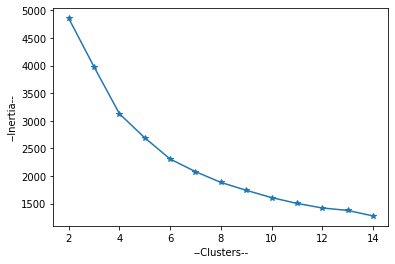

In [ ]:
# First I'll create an empty list of inertias
inertias = []

# Next I'll loop through k values of 2 - 15 and store the inertias in a list
for k in range(2,15):
  kmeans = KMeans(n_clusters = k)
  kmeans.fit(scaled_cust_df)
  inertias.append(kmeans.inertia_)

# Visualize the scores
plt.plot(range(2,15), inertias, marker = '*')
plt.xlabel('--Clusters--')
plt.ylabel('--Inertia--')

In the Inertia's line plot, the bend in the elbow seems to be between 4 & 6. Indicating 4-6 would be good candidates for the number of clusters.

- Create a plot of Silhouette Scores

Text(0, 0.5, '--Silhouette Score--')

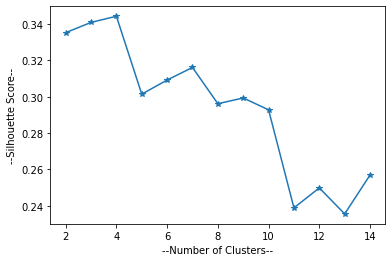

In [ ]:
# Save Silhouette Scores for vaious cluster numbers in a list
silhouette_scores = []

# Look for the k values of 2 - 15
for i in range(2,15):
  kmeans = KMeans(n_clusters= i)
  kmeans.fit(scaled_cust_df)
  silhouette_scores.append(silhouette_score(scaled_cust_df, kmeans.labels_))

# Visualize the Scores
plt.plot(range(2,15), silhouette_scores, marker = '*')
plt.xlabel('--Number of Clusters--')
plt.ylabel('--Silhouette Score--')

The above plot showes that 4 would be a good number of clusters, which is in the range of 4-6 that the Inertia plot showed us. 

The number of Clusters we are going to use is 4

- Chosen K based on Results:
#4

In [ ]:
# Fit the KMeans model with 4 clusters and display the silhouette score
kmeans4 = KMeans(n_clusters=4)
kmeans4.fit(scaled_cust_df)
silhouette_score(scaled_cust_df, kmeans4.labels_)

0.3442216278513939

The above silhouette score is a little low so we are going to see what fitting the KMeans model with 6 clusters does

In [ ]:
kmeans6 = KMeans(n_clusters=6)
kmeans6.fit(scaled_cust_df)
silhouette_score(scaled_cust_df, kmeans6.labels_)

0.30890704800794877

The silhouette score of 6 clusters is better as it is closer to 1. We are going to graph both clusters to visually compare the two

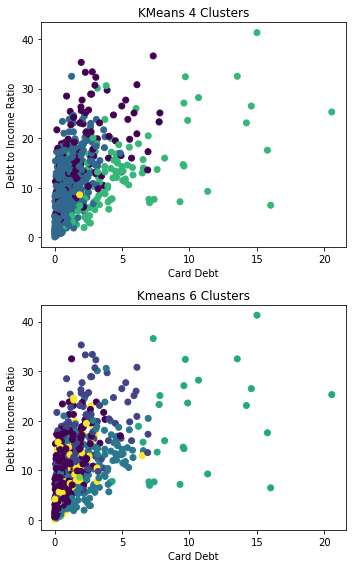

In [ ]:
# Save the cluster labels to the dataframe
cust_df['cluster4'] = kmeans4.labels_
cust_df['cluster6'] = kmeans6.labels_

# Visualize the Clusters
fig, axes = plt.subplots(2,1, figsize = (5,8))
axes[0].scatter(cust_df['Card Debt'], cust_df['DebtIncomeRatio'], c = cust_df['cluster4'])
axes[0].set_xlabel('Card Debt')
axes[0].set_ylabel('Debt to Income Ratio')
axes[0].set_title('KMeans 4 Clusters')
axes[1].scatter(cust_df['Card Debt'], cust_df['DebtIncomeRatio'], c = cust_df['cluster6'])
axes[1].set_xlabel('Card Debt')
axes[1].set_ylabel('Debt to Income Ratio')
axes[1].set_title('Kmeans 6 Clusters')
plt.tight_layout();